In [16]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize, minimize_scalar, least_squares
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [17]:
# Fitting function
def logistic_growth(t, K, r, N0):
    return K / (1 + ((K-N0)/N0)*np.exp(-r*t))

### II. Модел за интерспециска конкуренција - Експеримент на Gause со Paramecium <a class="anchor" id="chapter2"></a>
#### II.1 Интраспециска конкуренција на P. aurelia и P. caudatum <a class="anchor" id="section_2_1"></a>

In [3]:
pr = pd.read_csv('paramecium_data.txt', '\t')
pr

,Time,P. aurelia,P. caudatum,P. aurelia competition,P. caudatum competition
0,0,2.0,2,2,2.0
1,1,3.0,5,4,8.0
2,2,29.0,22,29,20.0
3,3,92.0,16,66,25.0
4,4,173.0,39,141,24.0
5,5,210.0,52,162,NaN
6,6,210.0,54,219,NaN
7,7,240.0,47,153,NaN
8,8,NaN,50,162,21.0
9,9,NaN,26,150,15.0


In [4]:
pr['P. aurelia'] = pr['P. aurelia'].interpolate(method='nearest')
pr['P. caudatum competition'] = pr['P. caudatum competition'].interpolate(method='nearest')

In [5]:
pr

,Time,P. aurelia,P. caudatum,P. aurelia competition,P. caudatum competition
0,0,2.0,2,2,2.0
1,1,3.0,5,4,8.0
2,2,29.0,22,29,20.0
3,3,92.0,16,66,25.0
4,4,173.0,39,141,24.0
5,5,210.0,52,162,24.0
6,6,210.0,54,219,24.0
7,7,240.0,47,153,21.0
8,8,240.0,50,162,21.0
9,9,240.0,26,150,15.0


[94.687  1.261  1.26 ]


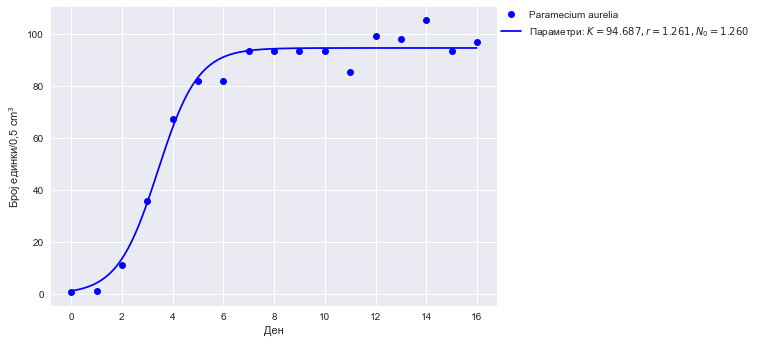

In [6]:
# Experimental data
xData = pr['Time']
yDataAurelia = 0.39 * pr['P. aurelia']
 
# Plot experimental data points
plt.plot(xData, yDataAurelia, 'bo', label='Paramecium aurelia')
 
# Initial guess for the parameters
initialGuess = [yDataAurelia.iloc[-1],1,1]    
 
# Perform the curve-fit
poptAurelia, pcovAurelia = curve_fit(logistic_growth, xData, yDataAurelia, initialGuess)
poptAurelia = np.round(poptAurelia,3)
print(poptAurelia)
 
# x values for the fitted function
xFit = np.arange(0.0,16.0,0.01)
 
# Plot the fitted function
plt.plot(xFit, logistic_growth(xFit, *poptAurelia), 'b', label='Параметри: $K=%5.3f, r=%5.3f, N_0=%5.3f$' % tuple(poptAurelia))
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

[54.882  0.901  2.979]


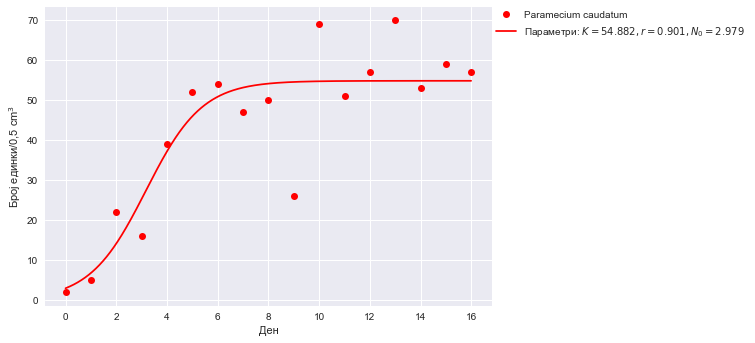

In [7]:
# Experimental data
xData = pr['Time']
yDataCaudatum = pr['P. caudatum']
 
# Plot experimental data points
plt.plot(xData, yDataCaudatum, 'ro', label='Paramecium caudatum')
 
# Initial guess for the parameters
initialGuess = [yDataCaudatum.iloc[-1],1,1]    
 
# Perform the curve-fit
poptCaudatum, pcovCaudatum = curve_fit(logistic_growth, xData, yDataCaudatum, initialGuess)
poptCaudatum = np.round(poptCaudatum,3)
print(poptCaudatum)
 
# x values for the fitted function
xFit = np.arange(0.0,16.0,0.01)
 
# Plot the fitted function
plt.plot(xFit, logistic_growth(xFit, *poptCaudatum), 'r', label='Параметри: $K=%5.3f, r=%5.3f, N_0=%5.3f$' % tuple(poptCaudatum))
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#### II.2 Интерспециска конкуренција на P. aurelia и P. caudatum <a class="anchor" id="section_2_2"></a>

In [8]:
x_exp = 0.39 * pr['P. aurelia competition'].values
y_exp = pr['P. caudatum competition'].values
t_exp = pr['Time'].values

[1.261 0.013 0.018 0.901 0.012 0.016]


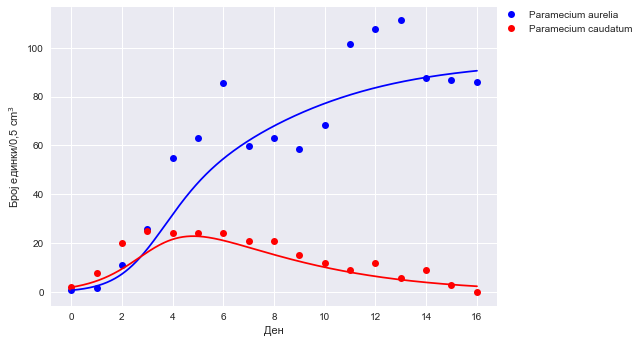

In [9]:
# model parameters
L = poptAurelia[1]                        # L
A = poptAurelia[1]/poptAurelia[0]         # A
B = 1.35*poptAurelia[1]/poptAurelia[0]    # B 
M = poptCaudatum[1]                       # M
C = 0.75*poptCaudatum[1]/poptCaudatum[0]  # C 
D = poptCaudatum[1]/poptCaudatum[0]       # D
params = np.round([L, A, B, M, C, D],3)
print(params)
dt = 0.01; max_time = t_exp[-1]

# initial time and populations
t_el = t_exp[0]; x_el = x_exp[0]; y_el = y_exp[0]

# empty lists in which to store time and populations
t_calc = []; x_calc = []; y_calc = []

# initialize lists
t_calc.append(t_el); x_calc.append(x_el); y_calc.append(y_el)

while t_el < max_time:
    # calc new values for t_el, x_el, y_el
    t_el = t_el + dt
    x_el = x_el + x_el*(L - A*x_el - B*y_el)*dt
    y_el = y_el + y_el*(M - C*x_el - D*y_el)*dt
    
    # store new values in lists
    t_calc.append(t_el)
    x_calc.append(x_el)
    y_calc.append(y_el)

# Experimental data
plt.plot(t_exp, x_exp, 'bo', label='Paramecium aurelia')
plt.plot(t_exp, y_exp, 'ro', label='Paramecium caudatum')
plt.plot(t_calc, x_calc, 'b-')
plt.plot(t_calc, y_calc, 'r-')
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

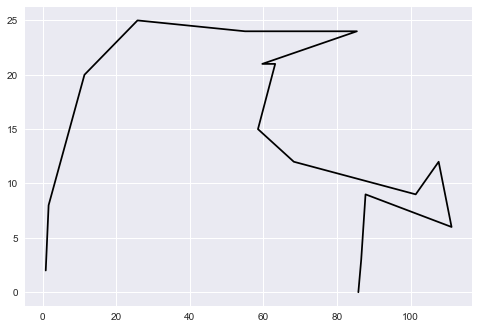

In [10]:
plt.plot(x_exp, y_exp, 'k-')
plt.show()

In [11]:
def objective_function(z): 
    return np.sum((z[0] - z[1])**2) + np.sum((z[2] - z[3])**2)

In [12]:
#z = np.array([x_exp, x_calc[::100], y_exp, y_calc[::100]])

[0.637 0.637 0.459 0.46  0.012 0.016]


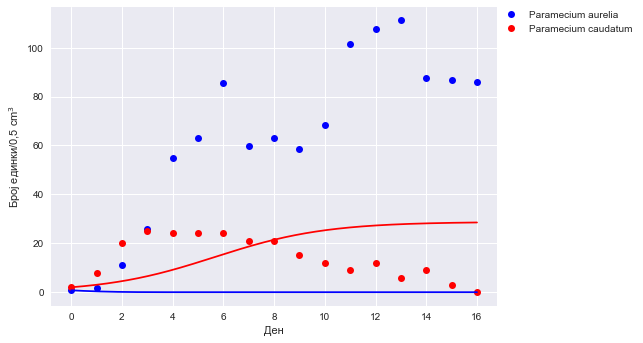

In [13]:
opt = least_squares(objective_function, x0=params)
opt.x = np.round(opt.x, 3)
print(opt.x)

# model parameters
L = opt.x[0]
A = opt.x[1]
B = opt.x[2]
M = opt.x[3]
C = opt.x[4]
D = opt.x[5]
dt = 0.001; max_time = pr['Time'].iloc[-1]

# initial time and populations
t_el = t_exp[0]; x_el = x_exp[0]; y_el = y_exp[0]

# empty lists in which to store time and populations
t_opt = []; x_opt = []; y_opt = []

# initialize lists
t_opt.append(t_el); x_opt.append(x_el); y_opt.append(y_el)

while t_el < max_time:
    # calc new values for t_el, x_el, y_el
    t_el = t_el + dt
    x_el = x_el + x_el*(L - A*x_el - B*y_el)*dt
    y_el = y_el + y_el*(M - C*x_el - D*y_el)*dt
    
    # store new values in lists
    t_opt.append(t_el)
    x_opt.append(x_el)
    y_opt.append(y_el)

# Experimental data
plt.plot(t_exp, x_exp, 'bo', label='Paramecium aurelia')
plt.plot(t_exp, y_exp, 'ro', label='Paramecium caudatum')
plt.plot(t_opt, x_opt, 'b-')
plt.plot(t_opt, y_opt, 'r-')
plt.xlabel('Ден')
plt.ylabel('Број единки/0,5 cm$^3$')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

def model(z,t):
    #L = 1.261
    #A = 0.013
    #B = 0.018
    #M = 0.901
    #C = 0.012
    #D = 0.016
    L = poptAurelia[1]                        # L
    A = poptAurelia[1]/poptAurelia[0]         # A
    B = 1.35*poptAurelia[1]/poptAurelia[0]    # B 
    M = poptCaudatum[1]                       # M
    C = 0.75*poptCaudatum[1]/poptCaudatum[0]  # C 
    D = poptCaudatum[1]/poptCaudatum[0]       # D
    
    x = z[0]
    y = z[0]
    
    dxdt = x*(L - A*x - B*y)
    dydt = y*(M - C*x - D*y)
    
    dzdt = [dxdt,dydt]
    return dzdt

#initial condition
#z0 = [x[0],y[0]]

#time points
t = np.linspace(0,pr['Time'].iloc[-1],1700)

#solve ODE
#z = odeint(model,z0,t)

#x_calc = z[:,0]
#y_calc = z[:,1]
x_calc = x_list
y_calc = y_list

#plot results
plt.plot(pr['Time'], x, 'bo', label='P. aurelia')
plt.plot(pr['Time'], y, 'ro', label='P. caudatum')
plt.plot(t[:1601],x_calc[:1601],'b--', label='P. aurelia calculated')
plt.plot(t[:1601],y_calc[:1601],'r--', label='P. caudatum calculated')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

K1 = x[0]
K2 = -np.power(x[0],2)
K3 = -x[0]*y[0]
K4 = np.power(x[0],3)
K5 = np.power(x[0],2)*y[0]
K6 = x[0]*np.power(y[0],2)

R1 = y[0]
R2 = -x[0]*y[0]
R3 = -np.power(y[0],2)
R4 = np.power(x[0],2)*y[0]
R5 = np.power(y[0],2)*x[0]
R6 = np.power(y[0],3)

s1 = xdot[0]
s2 = -x[0]*xdot[0]
s3 = -y[0]*xdot[0]

q1 = ydot[0]
q2 = -x[0]*ydot[0]
q3 = -y[0]*ydot[0]

for i in range(len(x)):
    K1 = K1 + x[i]
    K2 = K2 - np.power(x[i],2)
    K3 = K3 - x[i]*y[i]
    K4 = K4 + np.power(x[i],3)
    K5 = K5 + np.power(x[i],2)*y[i]
    K6 = K6 + x[i]*np.power(y[i],2)
    
    R1 = R1 + y[i]
    R2 = R2 - x[i]*y[i]
    R3 = R3 - np.power(y[i],2)
    R4 = R4 + np.power(x[i],2)*y[i]
    R5 = R5 + np.power(y[i],2)*x[i]
    R6 = R6 + np.power(y[i],3)
    
    s1 = s1 + xdot[i]
    s2 = s2 - x[i]*xdot[i]
    s3 = s3 - y[i]*xdot[i]
    
    q1 = q1 + ydot[i]
    q2 = q2 - x[i]*ydot[i]
    q3 = q3 - y[i]*ydot[i]

W = np.array([[K1, K2, K3, 0, 0, 0],
              [K2, K4, K5, 0, 0, 0],
              [K3, K4, K6, 0, 0, 0],
              [0, 0, 0, R1, R2, R3],
              [0, 0, 0, R2, R4, R5],
              [0, 0, 0, R3, R4, R6]])
u = np.array([[s1], [s2], [s3], [q1], [q2], [q3]])
p = np.round(np.matmul(np.linalg.inv(W),u),5)
p

xdot = f_dot(x,h=1)
ydot = f_dot(y,h=1)

e2 = g - y*(M - C*x - D*y)
eq12 = e2*e2.diff(M)
eq22 = e2*e2.diff(C)
eq32 = e2*e2.diff(D)
sp.expand(eq12), sp.expand(eq22), sp.expand(eq32)

e1 = f - x*(L - A*x - B*y)
eq11 = e1*e1.diff(L)
eq21 = e1*e1.diff(A)
eq31 = e1*e1.diff(B)
sp.expand(eq11), sp.expand(eq21), sp.expand(eq31)

#x, y, A, B, C, D, L, M, f, g = sp.symbols('x y A B C D L M f g')
display((x,y,A,B,C,D,L,M,f,g))

import sympy as sp
sp.init_printing()

In [14]:
x_exp = [0.78,   1.56,  11.31,  25.74,  54.99,  63.18,  85.41,  59.67, 
        63.18,  58.5 ,  68.25, 101.4 , 107.64, 111.15,  87.75,  86.58,
        85.8]

x_calc = [0.78 ,  2.534,  7.403, 17.622, 31.714, 44.712, 54.538, 61.972,
       67.955, 72.957, 77.169, 80.689, 83.59 , 85.949, 87.845, 89.354,
       90.545]

y_exp = [ 2.,  8., 20., 25., 24., 24., 24., 21., 21., 15., 12.,  9., 12.,
        6.,  9.,  3.,  0.]

y_calc = [ 2.   ,  4.577,  9.496, 16.301, 21.608, 22.859, 21.15 , 18.321,
       15.348, 12.602, 10.201,  8.167,  6.48 ,  5.105,  3.999,  3.118,
        2.422]

init = [1.261, 0.013, 0.018, 0.901, 0.012, 0.016]

def objective_function(z): 
    return (np.sum((z[0] - z[1])**2) + np.sum((z[2] - z[3])**2))/2

z = np.array([x_exp, x_calc, y_exp, y_calc])

opt = minimize(objective_function, x0=params)
opt.x

array([0.63699999, 0.63699999, 0.45949999, 0.45949999, 0.012     ,
       0.016     ])

### Тестирање на резидууми со логистичка равенка

In [24]:
# Simulirani podatoci
t_exp = np.arange(0,20,0.5)
y_exp = logistic_growth(t_exp, K=90, r=0.7, N0=5)

In [80]:
def load_data():
    t_exp = np.arange(0,20,0.5).reshape(1,40)
    y_exp = logistic_growth(t_exp, K=90, r=0.7, N0=5) + np.random.uniform(-10,10,(1,40))
    return t_exp, y_exp

In [81]:
def plot_data_with_model(t_exp, y_exp, ym, summary):
    plt.plot(t_exp, y_exp, 'ro')
    plt.show()
    print(summary)

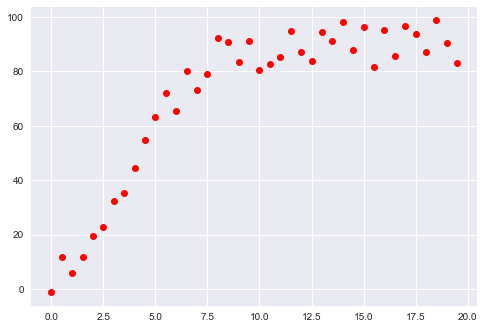

Parameters K=90, r=0.7, N0=5 yield RSS=1010.12
Parameters K=90, r=0.7, N0=5 yield RSS=1010.12


In [82]:
def compute_rss_and_plot_fit(K, r, N0):
    xd, yd = load_data()
    ym = logistic_growth(t_exp, K, r, N0)
    rss = np.sum(np.square(ym - y_exp))
    summary = "Parameters K={}, r={}, N0={} yield RSS={:0.2f}".format(K, r, N0, rss)
    fig = plot_data_with_model(t_exp, y_exp, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(K=90, r=0.7, N0=5)
print(summary)

In [ ]:
params = [90, 0.7, 5]
opt = minimize(compute_rss_and_plot_fit, x0=params, args=params)
opt.x

In [85]:
from lmfit import minimize, Parameters, Parameter, report_fit
import warnings

In [146]:
def f(xs, t, ps):
    """Lotka-Volterra competition model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
        l = ps['l'].value
        m = ps['m'].value
    except:
        a, b, c, d, l, m = ps

    x, y = xs
    return [x*(l - a*x - b*y), y*(m - c*x - d*y)]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    model = np.array(model)
    print(np.sum((data[0] - model[:,0][::100])**2) + np.sum((data[1] - model[:,1][::100])**2))
    return np.sum((data[0] - model[:,0][::100])**2) + np.sum((data[1] - model[:,1][::100])**2)

t = np.linspace(0, 17, 1700)
x0 = np.array([1,1])

a, b, c, d, l, m = 1.261, 0.013, 0.018, 0.901, 0.012, 0.016
true_params = np.array((a, b, c, d, l, m))

#np.random.seed(123)
#data = g(t, x0, true_params)
#data += np.random.normal(size=data.shape)
data = np.array([[0.78,   1.56,  11.31,  25.74,  54.99,  63.18,  85.41,  59.67, 
        63.18,  58.5 ,  68.25, 101.4 , 107.64, 111.15,  87.75,  86.58,
        85.8],
        [0.78 ,  2.534,  7.403, 17.622, 31.714, 44.712, 54.538, 61.972,
       67.955, 72.957, 77.169, 80.689, 83.59 , 85.949, 87.845, 89.354,
       90.545]])

# set parameters incluing bounds
params = Parameters()
params.add('x0', value=data[0, 0])
params.add('y0', value=data[0, 1])
params.add('a', value=a)
params.add('b', value=b)
params.add('c', value=c)
params.add('d', value=d)
params.add('l', value=l)
params.add('m', value=m)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)

157970.58317235476


TypeError: Improper input: N=8 must not exceed M=1

In [149]:
t = np.linspace(0, 17, 1700)

model = odeint(f, t=t, x0=true_params, args=(ps,))

NameError: name 'ps' is not defined